In [1]:
# pdf_path = "test/pdf/dc/form/Blue_Book_2023_web.pdf"
pdf_path = "test/pdf/dc/form/091234-00154-20200109.pdf"

# PDF Plumber

In [2]:
import pdfplumber
import pandas as pd
import numpy as np

pdf = pdfplumber.open(pdf_path)

In [4]:
print(pdf.pages[11].extract_words())

[{'text': 'CROP', 'x0': 148.92392, 'x1': 174.350144, 'top': 65.16624000000002, 'doctop': 8777.16624, 'bottom': 76.20623999999998, 'upright': True, 'direction': 1}, {'text': 'SPECIFIC', 'x0': 176.872784, 'x1': 215.713712, 'top': 65.16624000000002, 'doctop': 8777.16624, 'bottom': 76.20623999999998, 'upright': True, 'direction': 1}, {'text': 'DIRECTIONS', 'x0': 218.26064, 'x1': 273.734432, 'top': 65.16624000000002, 'doctop': 8777.16624, 'bottom': 76.20623999999998, 'upright': True, 'direction': 1}, {'text': 'AND', 'x0': 276.18972800000006, 'x1': 297.17014400000005, 'top': 65.16624000000002, 'doctop': 8777.16624, 'bottom': 76.20623999999998, 'upright': True, 'direction': 1}, {'text': 'RESTRICTIONS', 'x0': 299.6055680000001, 'x1': 365.0462720000002, 'top': 65.16624000000002, 'doctop': 8777.16624, 'bottom': 76.20623999999998, 'upright': True, 'direction': 1}, {'text': 'FOR', 'x0': 367.5048800000002, 'x1': 386.2033280000002, 'top': 65.16624000000002, 'doctop': 8777.16624, 'bottom': 76.2062399

In [5]:
print(pdf.pages[11].extract_text())

CROP SPECIFIC DIRECTIONS AND RESTRICTIONS FOR CLETHODIM 2EC 
Crops1  Minimum Time from  Use Rate  Crop Oil Concentrate  Special Use Instructions 
Application to  Per Acre  Rates Per Acre2 
Harvest (PHI) 
Alfalfa including:  15 days before grazing,  6-16 fl. oz.(4)  1 qt. by ground or 1.0%  For repeat applications make on a 
Sainfoin  feeding or harvesting  (0.09375 -  v/v (but no less than 1  minimum of a 14-day interval. 
Holy Clover  (cutting) for forage or  0.25 lb a.i.)  pt./A) by air 5   
Birdsfoot trefoil(3)  hay  Refer to tank mix partners for feeding, 
grazing and harvesting restrictions. (5,6) 
 
The addition of AMS has shown improved 
grass control for difficult to control species 
including: quackgrass, rhizome 
Johnsongrass, red rice, wild oats, volunteer 
cereals and volunteer corn. 
 
RESTRICTIONS: 
• DO NOT apply more than 16 fl. oz./A 
(0.25 lb ai) in a single application. 
• DO NOT make more than 2 
applications per acre per year. 
• DO NOT apply more than 32 fl oz 
( 

In [36]:
# Turn tables into dataframes

dfs = []
table_settings = {
    # "vertical_strategy": "text",
    # "horizontal_strategy": "lines",
}

for table in pdf.pages[11].extract_tables(table_settings=table_settings):
    df = pd.DataFrame(table)
    dfs.append(df)


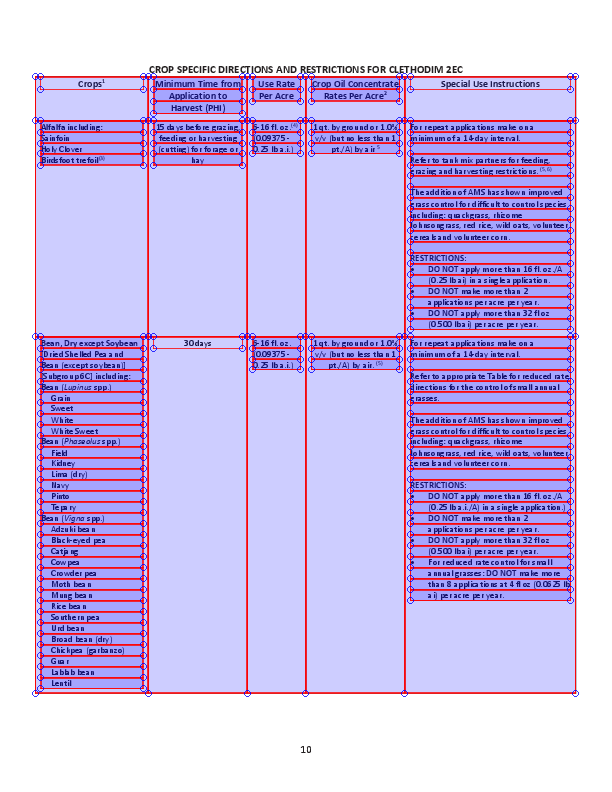

In [37]:
im = pdf.pages[11].to_image()
im.reset().debug_tablefinder(table_settings)

In [13]:
dfs[0]

,0,1,2,3,4
0,Crops1,Minimum Time from \nApplication to \nHarvest (...,Use Rate \nPer Acre,Crop Oil Concentrate \nRates Per Acre2,Special Use Instructions
1,Alfalfa including: \nSainfoin \nHoly Clover \n...,"15 days before grazing, \nfeeding or harvestin...",6-16 fl. oz.(4) \n(0.09375 - \n0.25 lb a.i.),1 qt. by ground or 1.0% \nv/v (but no less tha...,For repeat applications make on a \nminimum of...
2,"Bean, Dry except Soybean \n[Dried Shelled Pea ...",30 days,6-16 fl. oz. \n(0.09375 - \n0.25 lb a.i.),1 qt. by ground or 1.0% \nv/v (but no less tha...,For repeat applications make on a \nminimum of...


In [43]:
chars = pdf.pages[11].chars


In [45]:
# Find the mean value of chars font size
font_size = np.mean([char["size"] for char in chars])
font_size

9.08556701030928

In [70]:
pdf.pages[11].chars[66]["size"]

9.960000000000036

In [69]:
pdf.pages[11].chars[67]["size"]

9.960000000000036

In [90]:
pdf.pages[11].chars[68]["size"]

6.480000000000018

In [166]:
# Filter out all subscripts
def superscript_filter(obj):
    if obj["object_type"] == "char": 
        # if obj size is within 20% of the mean font size
        return obj["size"] >= font_size * 0.8
    
    else:
        return True

filtered_page = pdf.pages[11].filter(superscript_filter)
filtered_page

<Page:12>

In [131]:
filtered_page.extract_text()

''

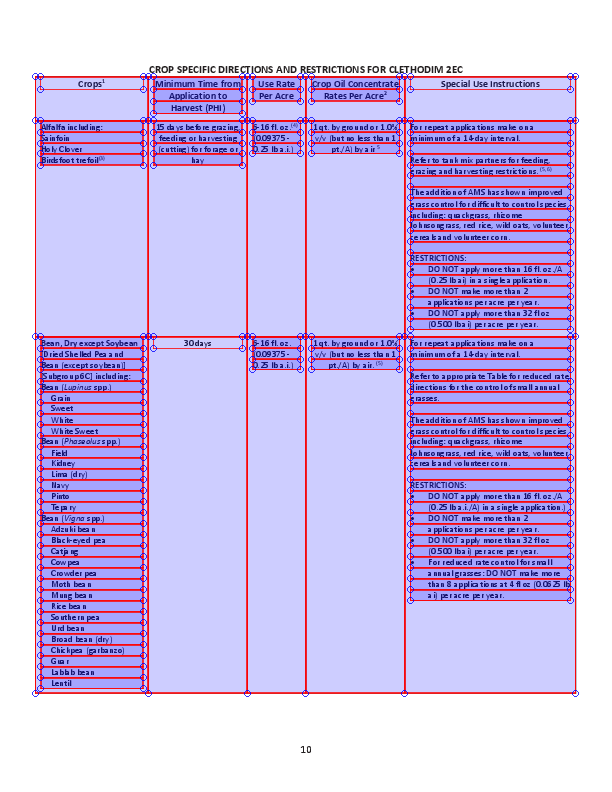

In [139]:
im = filtered_page.filter(superscript_filter).to_image()
im.reset().debug_tablefinder()

In [223]:
dfs = []

for table in filtered_page.extract_tables():
    table = [[cell.replace("\n", " ") if isinstance(cell, str) else cell for cell in row] for row in table]
    
    df = pd.DataFrame(table[1:], columns=table[0])
    dfs.append(df)

In [224]:
dfs[0]

,Crops,Minimum Time from Application to Harvest (PHI),Use Rate Per Acre,Crop Oil Concentrate Rates Per Acre,Special Use Instructions
0,Alfalfa including: Sainfoin Holy Clover Bir...,"15 days before grazing, feeding or harvesting...",6-16 fl. oz. (0.09375 - 0.25 lb a.i.),1 qt. by ground or 1.0% v/v (but no less than...,For repeat applications make on a minimum of ...
1,"Bean, Dry except Soybean [Dried Shelled Pea a...",30 days,6-16 fl. oz. (0.09375 - 0.25 lb a.i.),1 qt. by ground or 1.0% v/v (but no less than...,For repeat applications make on a minimum of ...


In [144]:
filtered_page2 = pdf.pages[30].filter(superscript_filter)
filtered_page2

<Page:31>

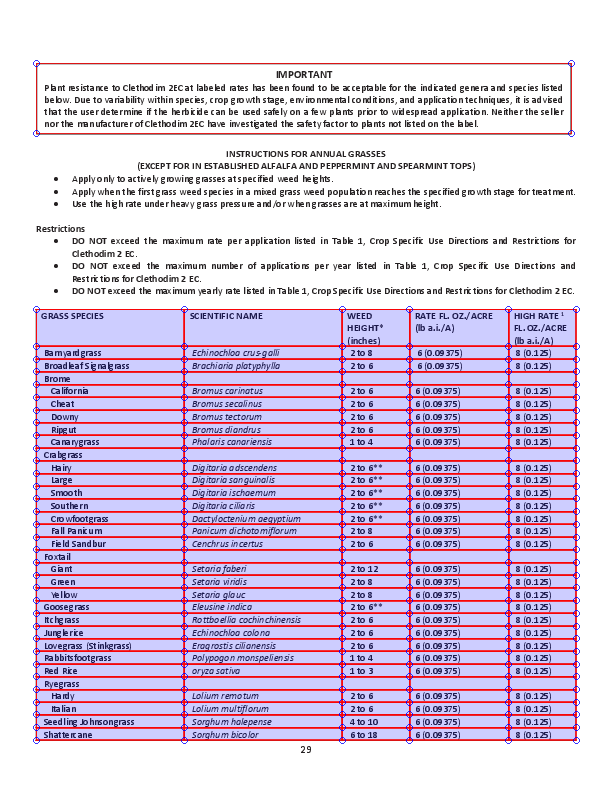

In [145]:
im2 = filtered_page2.filter(superscript_filter).to_image()
im2.reset().debug_tablefinder()

In [221]:
dfs = []

for table in filtered_page2.extract_tables():
    table = [[cell.replace("\n", " ") if isinstance(cell, str) else cell for cell in row] for row in table]

    df = pd.DataFrame(table[1:], columns=table[0])
    dfs.append(df)

In [222]:
dfs[0]

,GRASS SPECIES,SCIENTIFIC NAME,WEED HEIGHT* (inches),RATE FL. OZ./ACRE (lb a.i./A),HIGH RATE FL.OZ./ACRE (lb a.i./A)
0,Barnyardgrass,Echinochloa crus-galli,2 to 8,6 (0.09375),8 (0.125)
1,Broadleaf Signalgrass,Brachiaria platyphylla,2 to 6,6 (0.09375),8 (0.125)
2,Brome,,,,
3,California,Bromus carinatus,2 to 6,6 (0.09375),8 (0.125)
4,Cheat,Bromus secalinus,2 to 6,6 (0.09375),8 (0.125)
5,Downy,Bromus tectorum,2 to 6,6 (0.09375),8 (0.125)
6,Ripgut,Bromus diandrus,2 to 6,6 (0.09375),8 (0.125)
7,Canarygrass,Phalaris canariensis,1 to 4,6 (0.09375),8 (0.125)
8,Crabgrass,,,,
9,Hairy,Digitaria adscendens,2 to 6**,6 (0.09375),8 (0.125)


In [167]:
filtered_page3 = pdf.pages[35].filter(superscript_filter)
filtered_page3

<Page:36>

In [168]:
print(filtered_page3.extract_text())

• Always add the appropriate adjuvant to the spray mix at the rate specified for each specific tank mix combination. 
• Tank mix applications may sometimes result in reduced grass control and possible increases in crop injury as compared to 
either product used alone. If regrowth occurs, or an additional flush of new grass emerges, make a second application of 
Clethodim 2EC, as specified in the respective size and rate tables. 
• DO NOT tank mix Clethodim 2EC when broad leaf weeds are tall and/or dense enough to prevent proper grass coverage. 
 
MIXING INSTRUCTIONS 
1. Fill clean spray tank 1/2 to 2/3 of desired level with clean water. 
2. While agitating, add the correct amount of Clethodim 2EC. Agitation must create a rippling or rolling action on the water 
surface. 
3. If tank mixing Clethodim 2EC with other labeled herbicides, add water soluble bags first, followed by dry formulations, 
flowables, emulsifiable concentrates, and then solutions. Prepare no more spray mixture than i

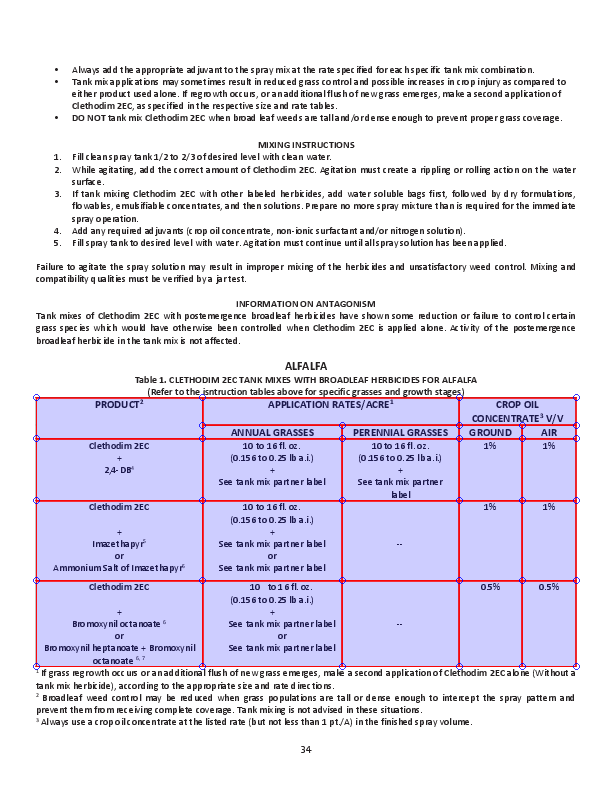

In [169]:
im3 = filtered_page3.filter(superscript_filter).to_image()
im3.reset().debug_tablefinder()

In [245]:
dfs = []

for table in filtered_page3.extract_tables():
    table = [[cell.replace("\n", "") if isinstance(cell, str) else cell for cell in row] for row in table]

    df = pd.DataFrame(table)
    
    # Fill None cells with the value above, resolve merged cells
    df = df.fillna(method="ffill")

    dfs.append(df)

In [246]:
dfs[0]

,0,1,2,3,4
0,PRODUCT,APPLICATION RATES/ACRE,None,CROP OIL CONCENTRATE V/V,None
1,PRODUCT,ANNUAL GRASSES,PERENNIAL GRASSES,GROUND,AIR
2,"Clethodim 2EC + 2,4-DB",10 to 16 fl. oz. (0.156 to 0.25 lb a.i.) + See...,10 to 16 fl. oz. (0.156 to 0.25 lb a.i.) + See...,1%,1%
3,Clethodim 2EC + Imazethapyr or Ammonium Sa...,10 to 16 fl. oz. (0.156 to 0.25 lb a.i.) + Se...,--,1%,1%
4,Clethodim 2EC + Bromoxynil octanoate or Bromo...,10 to 16 fl. oz. (0.156 to 0.25 lb a.i.) + See...,--,0.5%,0.5%
